**Лекция 8**

# Метод главных компонент

> Словарь Вильяма Шекспира, по подсчету исследователей, составляет 12 000 слов.
Словарь негра из людоедского племени &laquo;Мумбо-Юмбо&raquo; составляет 300 слов.
Эллочка Щукина легко и свободно обходилась тридцатью. \
И. Ильф, Е. Петров &laquo;12 стульев&raquo;

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Малоранговые-аппроксимации-матриц" data-toc-modified-id="Малоранговые-аппроксимации-матриц-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Малоранговые аппроксимации матриц</a></span><ul class="toc-item"><li><span><a href="#Нормы-векторов" data-toc-modified-id="Нормы-векторов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Нормы векторов</a></span></li><li><span><a href="#Нормы-матриц" data-toc-modified-id="Нормы-матриц-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Нормы матриц</a></span></li><li><span><a href="#Теорема-Эккарта-—-Янга" data-toc-modified-id="Теорема-Эккарта-—-Янга-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Теорема Эккарта — Янга</a></span></li></ul></li><li><span><a href="#Метод-главных-компонент" data-toc-modified-id="Метод-главных-компонент-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Метод главных компонент</a></span><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Связь-с-сингулярным-разложением" data-toc-modified-id="Связь-с-сингулярным-разложением-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Связь с сингулярным разложением</a></span></li><li><span><a href="#Эффективная-размерность" data-toc-modified-id="Эффективная-размерность-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Эффективная размерность</a></span></li></ul></li><li><span><a href="#Примеры" data-toc-modified-id="Примеры-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Примеры</a></span><ul class="toc-item"><li><span><a href="#Выявление-скрытых-признаков" data-toc-modified-id="Выявление-скрытых-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выявление скрытых признаков</a></span></li><li><span><a href="#Аппроксимации-изображений" data-toc-modified-id="Аппроксимации-изображений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Аппроксимации изображений</a></span></li></ul></li><li><span><a href="#Источники" data-toc-modified-id="Источники-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Источники</a></span></li></ul></div>

In [1]:
# Imports
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [3]:
import warnings
warnings.filterwarnings('ignore')

# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

## Малоранговые аппроксимации матриц ##

В некоторых практических задачах требуется приближать заданную матрицу $A$ некоторой другой матрицей $A_k$ с заранее заданным рангом $k$.

Возникает вопрос, в каком смысле приближать?
Ответ: в смысле нормы.

### Нормы векторов ###

Во многих задачах, связанных с линейными пространствами, возникает необходимость сравнивать между собой элементы пространства, например, иметь возможность сказать, что один вектор в каком-то смысле мал по сравнению с другими.
Если пространство евклидово, естественно сравнивать векторы по длине.
Можно ввести скалярное произведение в пространство специально с этой целью, но часто природа объектов, составляющих пространство, такова, что нет никакого естественно связанного с ней скалярного произведения.
Кроме того, скалярное произведение как таковое может быть и ненужным, нужен только какой-то аналог длины вектора &mdash; числовая функция от вектора, обладающая несколькими важными свойствами.

**Определение.** *Нормой вектора* $\mathbf{x}$ называется вещественное число $\|\mathbf{x}\|$, удовлетворяющее следующим условиям:

1. $\|\mathbf{x}\| \ge 0$, причём $\|\mathbf{x}\| = 0$ только при $\mathbf{x} = 0$;
1. $\forall \alpha \in \mathbb{R}$: $\|\alpha \mathbf{x}\| = |\alpha| \|\mathbf{x}\|$;
1. $\|\mathbf{x} + \mathbf{y}\| \le \|\mathbf{x}\| + \|\mathbf{y}\|$ (выпуклость).

Линейное пространство, в котором задана норма, называется *нормированным*.

>В нормированном пространстве мы можем определить *расстояние* между векторами $\mathbf{x}$ и $\mathbf{y}$ как норму их разности  $\|\mathbf{y} - \mathbf{x}\|$.
Множество векторов нормированного пространства, расстояние от которых до некоторого вектора $\mathbf{a}$ не превосходит заданного числа $\varepsilon$, называется $\varepsilon$-*окрестностью* вектора $\mathbf{a}$.
Используя понятие окрестности, можно определить предел последовательности векторов нормированного пространства.
Таким образом, возникает возможность перенести на нормированные пространства в том или ином виде все понятия элементарного математического анализа.
Так возникают функциональные пространства и функциональный анализ.

**Примеры норм:**

1. Норма $L_1$ (*октаэдрическая*):
$\|\mathbf{x}\|_1 = \sum\limits_i |x_i|$;

1. Норма $L_2$ (*евклидова*):
$\|\mathbf{x}\|_2 = \left( \sum\limits_i |x_i|^2 \right)^{1/2}$;

1. Норма $L_p$ (норма *Гёльдера*):
$\|\mathbf{x}\|_p = \left( \sum\limits_i |x_i|^p \right)^{1/p}$, $p \ge 1$;

1. Норма $L_\infty$ (*кубическая*):
$\|\mathbf{x}\|_\infty = \max\limits_i |x_i|$.

**Определение.** Пусть концы отрезка принадлежат некоторому множеству. Множество, называется *выпуклыми*, если ему принадлежит и весь отрезок.

**Предложение.** Единичный шар любой нормы является выпуклым множеством.

Нарисуем единичные сферы в двумерном пространстве, соответствующие различным нормам. \
Сделаем несколько наблюдений:

1. Из рисунка становится ясным смысл названия октаэдрической и кубической норм.
1. При $p = 1$ норма Гёльдера переходит в октаэдрическую, а при $p \to \infty$ &mdash; в кубическую.
1. При $p < 1$ норма Гёльдера теряет свойство выпуклости и поэтому перестаёт быть нормой.

In [4]:
def x_t(t, r, p):
    return r * np.sign(np.cos(t)) * np.abs(np.cos(t))**(2/p)

def y_t(t, r, p):
    return r * np.sign(np.sin(t)) * np.abs(np.sin(t))**(2/p)

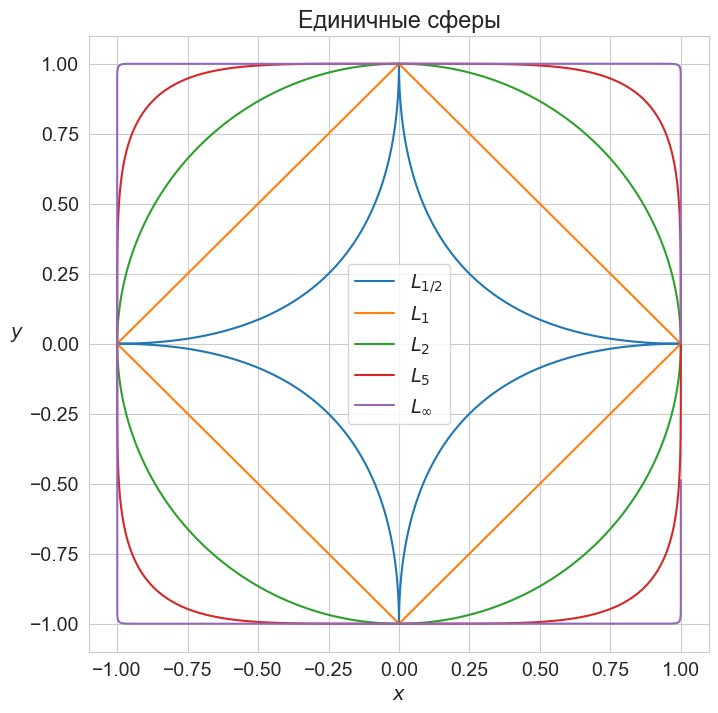

In [5]:
t = np.linspace(0, 2*np.pi, 501)
r = 1.

seaborn.set_style("whitegrid")
plt.figure(figsize=(8, 8))
plt.title('Единичные сферы')
labels = ['$L_{1/2}$','$L_1$','$L_2$','$L_5$','$L_\infty$']
for i, p in enumerate([1./2, 1, 2, 5, 100]):
    plt.plot(x_t(t, r, p), y_t(t, r, p), label=labels[i])

plt.xlabel(r"$x$")
plt.ylabel(r"$y$", rotation='horizontal', horizontalalignment='right')
plt.legend(loc=10);

### Нормы матриц ###

<!-- **Определение.** Нормой матрицы $A$ называется вещественное число $\|A\|$, удовлетворяющее следующим условиям:

1. $\|A\| \ge 0$, причём $\|A\| = 0$ только при $A = 0$;
1. $\forall \alpha \in \mathbb{R}$: $\|\alpha A\| = |\alpha| \|A\|$;
1. $\|A + B\| \le \|A\| + \|B\|$;
1. $\|A B\| \le \|A\| \cdot \|B\|$ (субмультипликативная норма). -->

Рассмотрим линейное пространство $\mathbb{M}_{m, n}$ матриц размеров $m \times n$.
В нём, как и в любом линейном пространстве, могут быть введены различные нормы.

**Определение.**
Матричная норма $\|A\|$ называется *согласованной* с векторной нормой $\|\mathbf{x}\|$, если 
$$ \|A \mathbf{x}\| \le \|A\| \cdot \|\mathbf{x}\|. $$

**Определение.**
Матричная норма $\|A\|$ называется *подчинённой* векторной норме $\|\mathbf{x}\|$, если
$$ \|A\| \equiv \sup\limits_{\mathbf{x} \ne 0} \dfrac{\|A \mathbf{x}\|}{\|\mathbf{x}\|} = \sup\limits_{\|\mathbf{x}\| = 1} \|A \mathbf{x}\|. $$

В этом случае говорят также, что векторная норма *индуцирует* матричную норму.

**Предложение.**
Если норма $\|A\|$ подчинена какой-то векторной норме $\|\mathbf{x}\|$, то она с ней согласована.
Более того, существует вектор $\mathbf{x}_0$, на котором достигается точная верхняя грань:
$$ \|A \mathbf{x}_0\| = \|A\| \cdot \|\mathbf{x}_0\|. $$

**Примеры:**

1. Евклидова норма векторов индуцирует *спектральную норму* матриц
$$ \|A\|_2 = \max \dfrac{\|A \mathbf{x}\|_2}{\|\mathbf{x}\|_2} = \sigma_1, $$
где $\sigma_1$ &mdash; максимальное сингулярное число.

1. *Норма Фробениуса*:
$$ \|A\|_F = \left( \sum\limits_{i,j} |a_{ij}|^2 \right)^{1/2}. $$
Можно показать, что
$\|A\|_F = \sqrt{\mathrm{tr} (A^\top A)} = \sqrt{\sigma_1^2 + \ldots + \sigma_r^2}$.

1. Ядерная норма:
$\|A\|_N = \sigma_1 + \ldots + \sigma_r$.

### Теорема Эккарта &mdash; Янга

**Теорема.**
Матрица $A_k = U \Sigma_k V^\top$ является наилучшим в смысле нормы Фробениуса приближением матрицы $A$ среди всех матриц ранга $k$.

>**Примечание.**
В 1955 году Мирский доказал, что подходит любая норма матрицы, если она зависит только от сингулярных чисел.

Итак, для любой нормы из приведённых выше

$$
  \|A - B\| \ge \|A - A_k\|, \quad \forall B: \mathrm{rank}(B) = k.
$$

---

## Метод главных компонент ##

В методе главных компонент (principal component analysis, PCA) строится минимальное число новых признаков, по которым исходные признаки восстанавливаются линейным преобразованием с минимальными погрешностями.
PCA относится к методам обучения без учителя.

### Постановка задачи

Пусть дана матрица признаков $F_{m \times n}$.

Сформируем $k$ новых признаков тех же объектов в виде линейных комбинаций исходных признаков.
Обозначим через $G$ матрицу признаков тех же объектов в новом пространстве меньшей размерности ($k \le n$).

Потребуем, чтобы исходные признаки можно было восстановить по новым с помощью некоторого линейного преобразования, определяемого матрицей $V_k^\top$:
$$ F_k = G V_k^\top. $$

Восстановленное описание $F_k$ не обязано в точности совпадать с исходным описанием $F$, но их отличие на объектах обучающей выборки должно быть как можно меньше при выбранной размерности $k$:
$$ \Delta^2(G, V_k) = \|F - G V_k^\top \|^2 \rightarrow \min_{G, V_k}. $$

**Теорема.**
Минимум $\Delta^2(G, V_k)$ достигается, когда столбцы матрицы $V_k$ есть собственные векторы матрицы $F^\top F$, соответствующие $k$ максимальным собственным значениям.
При этом $G = FV_k$, столбцы матрицы $G$ являются ортогональными, а матрицы $V_k$ &mdash; ортонормированными векторами.

**Определение.**
Собственные векторы $\mathbf{v}_1, \ldots, \mathbf{v}_k$, отвечающие максимальным собственным значениям, называются *главными компонентами*.

### Связь с сингулярным разложением

Запишем сингулярное разложение матрицы $F$:
$$ F = U \Sigma V^\top. $$

Домножим левую и правую часть равенства справа на матрицу $V_k$:
$$ F V_k = U \Sigma V^\top V_k = U_k \Sigma_k = G. $$
Здесь матрица $U_k$ состоит из первых $k$ столбцов $U$, $\Sigma_k$ &mdash; диагональная матрица с первыми $k$ сингулярными числами на главной диагонали.

Если $k = n$, то $\Delta^2(G, V_k) = 0$.
В этом случае представление $F = G V_k^\top$ является точным и совпадает с сингулярным разложением: $F = U \Sigma V^\top$.

Если $k < n$, то представление $F \approx G V_k^\top$ является приближённым.
Разложение матрицы $G V_k^\top$ получается из сингулярного разложения матрицы $F$ путём отбрасывания (обнуления) $n − k$ минимальных сингулярных значений.

Диагональность матрицы $G^\top G = \Lambda$ означает, что новые признаки $g_1, \ldots, g_k$ не коррелируют на обучающих объектах.
Поэтому ортогональное отображение $V$ называют *декоррелирующим* или отображением *Карунена &mdash; Лоэва*.

### Эффективная размерность

Главные компоненты содержат основную информацию о матрице $F$.
Число главных компонент $k$ называют также эффективной размерностью задачи.
На практике её определяют следующим образом.

Вводится функция *относительной погрешности* $E(k)$, показывающая, какая доля информации теряется при замене исходных признаковых описаний длины $n$ на более короткие описания длины $k$:
$$
  E(k) = \frac{\|F - G V_k^\top\|^2}{\|F\|^2}.
$$

Задаётся пороговое значение $\varepsilon \in [0, 1]$, достаточно близкое к нулю, и определяется *наименьшее целое $k$*, при котором относительная погрешность не превышает $\varepsilon$: $E(k) \le \varepsilon.$

Если в качестве нормы матрицы использовать норму Фробениуса, то получаем следующую формулу:
$$
  E(k) = \frac{\|F - G V_k^\top\|^2}{\|F\|^2} = \frac{\sigma_{k+1}^2 + \ldots + \sigma_n^2}{\sigma_1^2 + \ldots + \sigma_n^2} \le \varepsilon.
$$

---

## Примеры ##

### Выявление скрытых признаков

Рассмотрим таблицу оценок фильмов (столбцы &mdash; фильмы, строки &mdash; зрители)

$$
  F = 
  \begin{pmatrix}
    5 & 5 & 4 & 2 & 1 \\
    5 & 3 & 4 & 3 & 2 \\
    2 & 1 & 3 & 5 & 4 \\
    4 & 5 & 5 & 1 & 2 \\
    4 & 4 & 5 & 2 & 1 \\
    2 & 3 & 1 & 4 & 3 \\
    5 & 4 & 5 & 3 & 1 \\
    5 & 2 & 2 & 2 & 2 \\
  \end{pmatrix}.
$$

In [6]:
A = np.array([
    [ 5, 5, 4, 2, 1 ],
    [ 5, 3, 4, 3, 2 ],
    [ 2, 1, 3, 5, 4 ],
    [ 4, 5, 5, 1, 2 ],
    [ 4, 4, 5, 2, 1 ],
    [ 2, 3, 1, 4, 3 ],
    [ 5, 4, 5, 3, 1 ],
    [ 5, 2, 2, 2, 2 ],
])

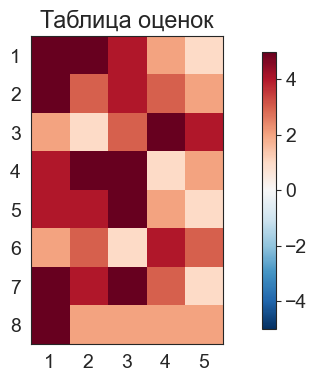

In [7]:
seaborn.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(10,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

vlims = [-5, 5]
x_ticks = np.arange(0,A.shape[1])
y_ticks = np.arange(0,A.shape[0])

im = ax.imshow(A, vmin=vlims[0],vmax=vlims[1], cmap='RdBu_r')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks+1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks+1)
ax.set_title("Таблица оценок")
fig.colorbar(im, shrink=0.90)

plt.show()

С помощью сингулярного разложения попробуем найти внутренние (скрытые) взаимосвязи в таблице данных.
Столбцы матрицы $U$ можно трактовать, как категории зрителей, а строки матрицы $V^\top$ &mdash; как категории фильмов. \
Для примера рассмотрим первые три главных компоненты.

In [8]:
# SVD 
U, sgm, Vt = LA.svd(A, full_matrices=False)
Sigma = np.diag(sgm)

print('s =', np.round(sgm, 2))

s = [20.67  5.92  2.74  2.38  1.54]


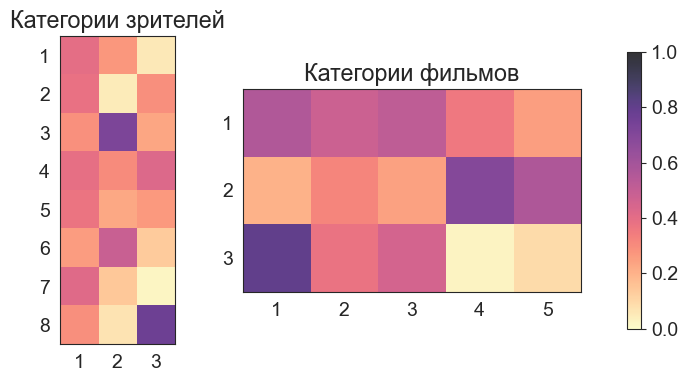

In [9]:
k = 3
fig, axes = plt.subplots(1, 2, figsize=(12,4))
im1 = axes[0].imshow(abs(U[:,:k]), vmin=0,vmax=1, cmap='magma_r', alpha=0.8)
axes[0].set_xticks(x_ticks[:k])
axes[0].set_xticklabels(x_ticks[:k]+1)
axes[0].set_yticks(y_ticks)
axes[0].set_yticklabels(y_ticks+1)
axes[0].set_title("Категории зрителей")

im2 = axes[1].imshow(abs(Vt[:k,:]),vmin=0,vmax=1, cmap='magma_r', alpha=0.8)
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels(x_ticks+1)
axes[1].set_yticks(y_ticks[:k])
axes[1].set_yticklabels(y_ticks[:k]+1)
axes[1].set_title("Категории фильмов")

fig.colorbar(im1, ax=axes.ravel().tolist(), shrink=0.90)
plt.show()

Видно, что к первой категории фильмов можно отнести фильмы 1-3, ко второй &mdash; 4-5, к третьей &mdash; фильм № 1. \
В первую группу входят зрители {1, 2, 4, 5, 7} (они выбрали фильмы из первой категории), во вторую &mdash; зрители № 3 и № 5, в последнюю группу входит только зритель № 8.

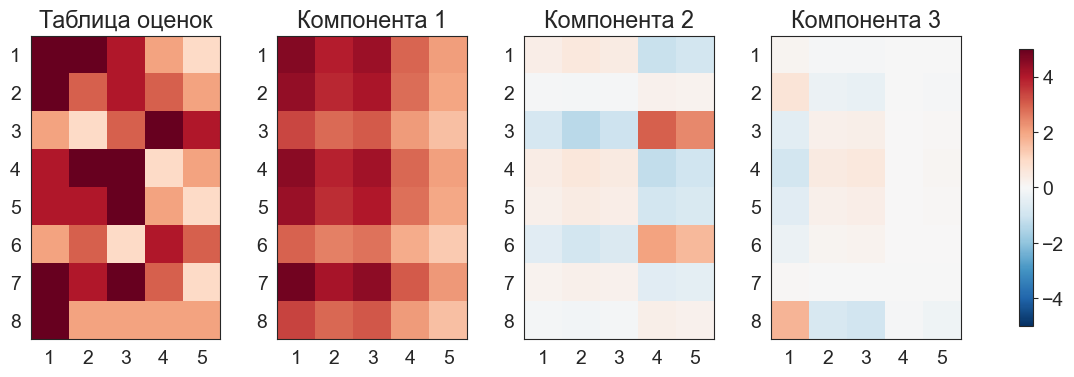

In [10]:
fig, axes = plt.subplots(1, k+1, figsize=(15,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

im = axes[0].imshow(A, vmin=vlims[0],vmax=vlims[1], cmap='RdBu_r')
axes[0].set_title("Таблица оценок")

for i in range(k):
    Fi = sgm[i] * U[:,i].reshape(-1,1) @ Vt[i,:].reshape(1,-1)
    axes[i+1].imshow(Fi, vmin=vlims[0],vmax=vlims[1], cmap='RdBu_r')
    axes[i+1].set_title(f"Компонента {i+1}")
for i in range(k+1):
    axes[i].set_xticks(x_ticks)
    axes[i].set_xticklabels(x_ticks+1)
    axes[i].set_yticks(y_ticks)
    axes[i].set_yticklabels(y_ticks+1)

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.90)
plt.show()

### Аппроксимации изображений

Посмотрим на главные компоненты картин или фотографий.

In [11]:
# Reading the image
img = plt.imread("pix/08.PCA/Mona Lisa.png")
print(np.shape(img))

(640, 429)


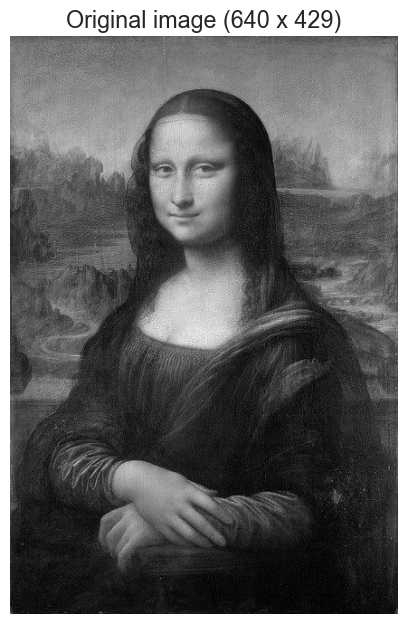

In [12]:
seaborn.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(5,10))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax.imshow(img, cmap='gray')
ax.set_axis_off()
ax.set_title(f"Original image ({img.shape[0]} x {img.shape[1]})")

plt.show()

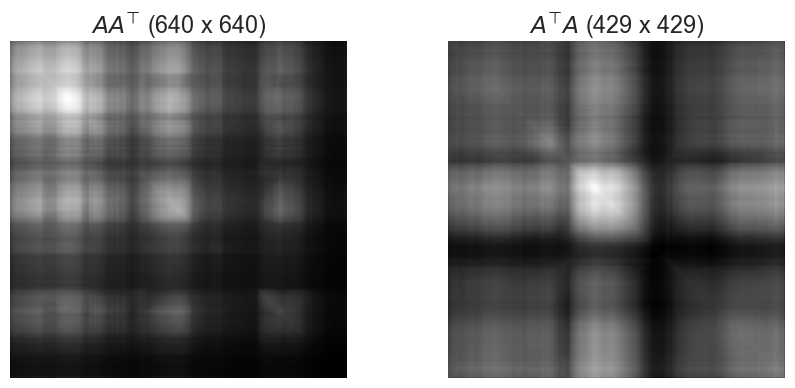

In [13]:
seaborn.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

Cor_1 = img@img.T
Cor_2 = img.T@img

axes[0].imshow(Cor_1, cmap='gray')
axes[0].set_axis_off()
axes[0].set_title(f'$AA^\\top$ ({Cor_1.shape[0]} x {Cor_1.shape[1]})')

axes[1].imshow(Cor_2, cmap='gray')
axes[1].set_axis_off()
axes[1].set_title(f'$A^\\top A$ ({Cor_2.shape[0]} x {Cor_2.shape[1]})')

plt.show()

In [14]:
# SVD 
U, sgm, Vt = LA.svd(img)
Sigma = np.diag(sgm)
print(np.shape(sgm))

S_sgm = sum(sgm**2)
eds = list(map(lambda i: sum(sgm[i:]**2) / S_sgm, range(len(sgm))))

(429,)


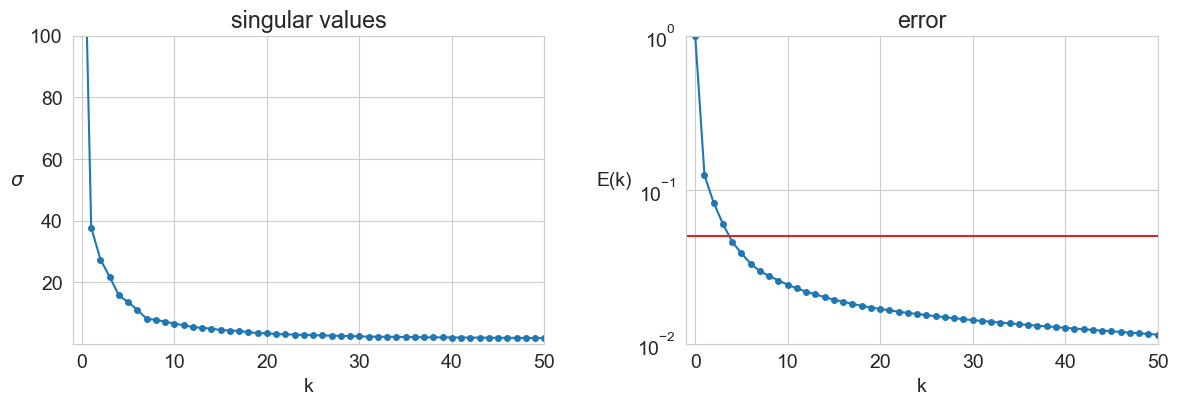

In [15]:
eps = 0.05
seaborn.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(sgm, 'o-')
ax1.set_title('singular values')
ax1.set_xlim(-1, 50)
ax1.set_ylim(1e-1, 1e2)
ax2.set_yscale('log')
ax1.set_xlabel('k')
ax1.set_ylabel('$\sigma$', rotation='horizontal', ha='right')

ax2.plot(eds, 'o-')
ax2.axhline(y=eps, c=cm(3))
ax2.set_title('error')
ax2.set_xlim(-1, 50)
ax2.set_ylim(1e-2, 1.0)
ax2.set_yscale('log')
ax2.set_xlabel('k')
ax2.set_ylabel('E(k)', rotation='horizontal', ha='right')

plt.show()

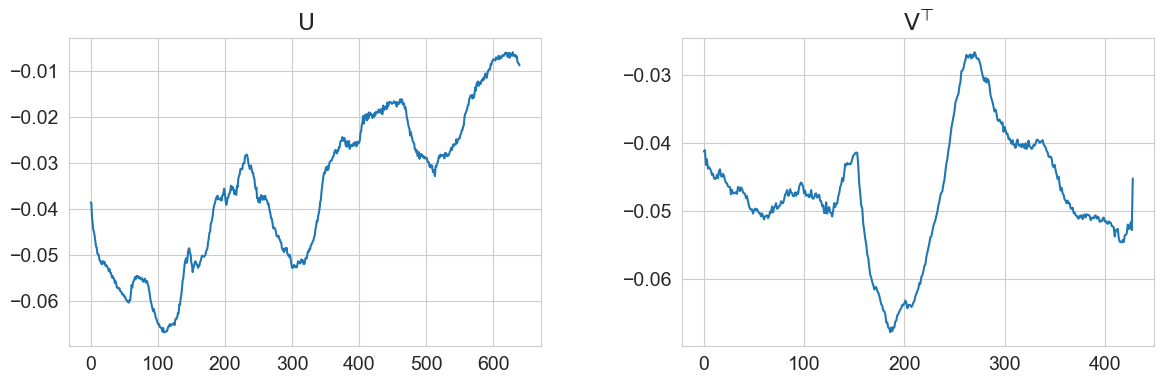

In [16]:
seaborn.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(U[:, :1])
ax1.set_title('$\mathrm{U}$')

ax2.plot(Vt[:1, :].T)
ax2.set_title('$\mathrm{V^\\top}$')

plt.show()

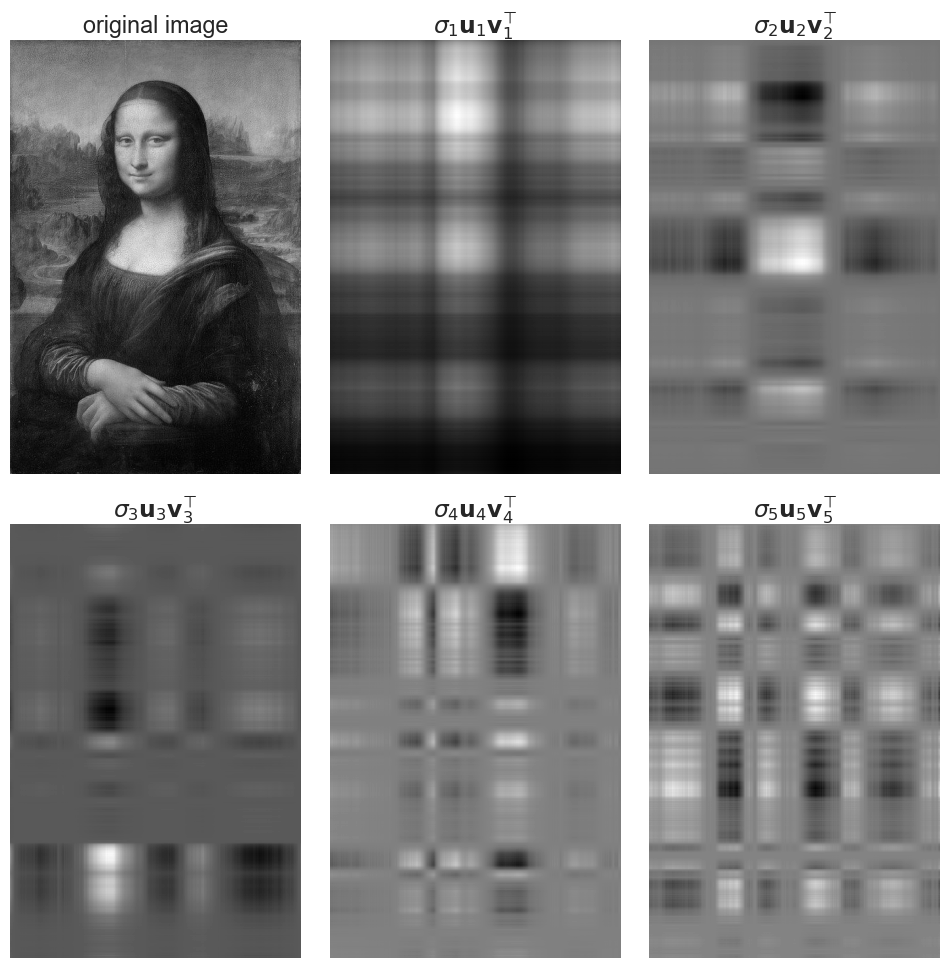

In [17]:
seaborn.set_style("white")
fig, axes = plt.subplots(2, 3, figsize=(12,12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_axis_off()
axes[0, 0].set_title("original image")
for i in range(5):
    img_i = sgm[i] * U[:,i].reshape(-1,1) @ Vt[i,:].reshape(1,-1)
    axes[(i+1)//3, (i+1)%3].imshow(img_i, cmap='gray')
    axes[(i+1)//3, (i+1)%3].set_axis_off()
    axes[(i+1)//3, (i+1)%3].set_title(
        f"$\sigma_{i+1} \mathbf{{u}}_{i+1} \mathbf{{v}}_{i+1}^\\top$")
    
plt.show()

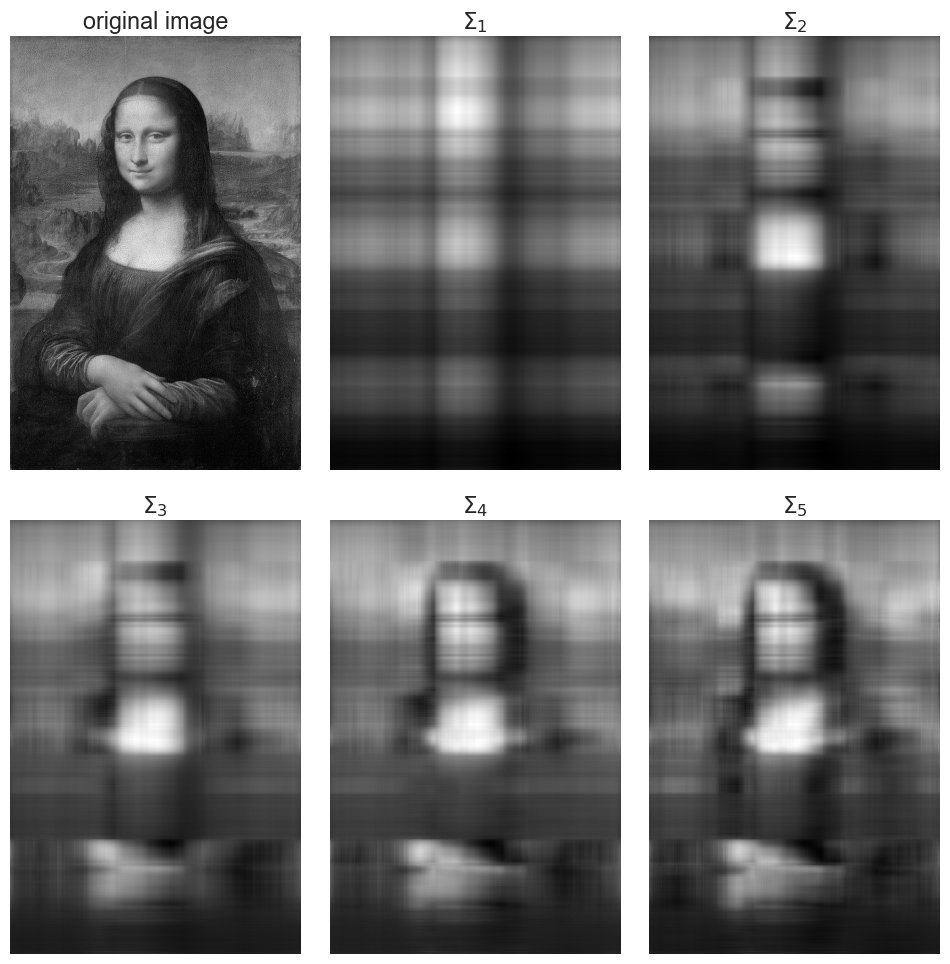

In [18]:
seaborn.set_style("white")
fig, axes = plt.subplots(2, 3, figsize=(12,12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_axis_off()
axes[0, 0].set_title("original image")
for i in range(1, 6):
    img_i = U[:, :i] @ Sigma[:i, :i] @ Vt[:i, :]
    axes[i//3, i%3].imshow(img_i, cmap='gray')
    axes[i//3, i%3].set_axis_off()
    axes[i//3, i%3].set_title(f"$\Sigma_{i}$")
    
plt.show()

In [19]:
k = 5
Sigma = np.zeros((img.shape[0], img.shape[1]))
Sigma[:min(img.shape[0], img.shape[1]), :min(img.shape[0], img.shape[1])] = np.diag(sgm)

# Reconstruction of the matrix using the first k singular values
img_k = U[:, :k] @ Sigma[:k, :k] @ Vt[:k, :]
# img_k2 = img @ Vt[:k, :].T @ Vt[:k, :]

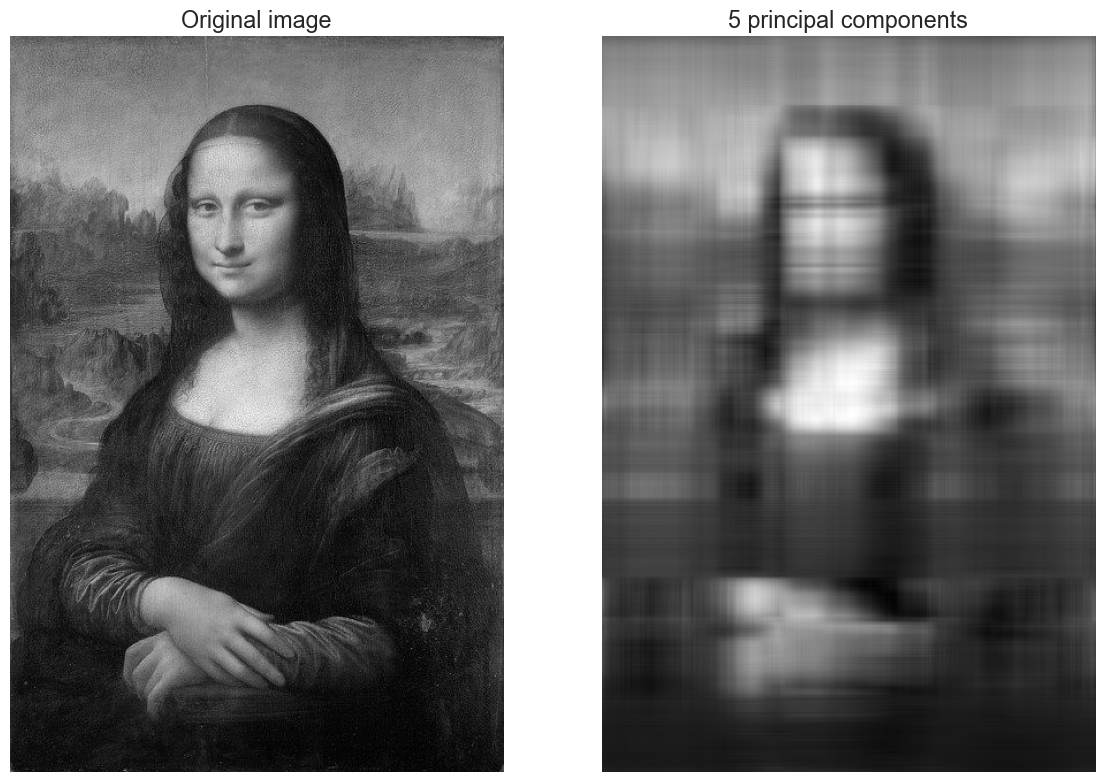

In [20]:
seaborn.set_style("white")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

ax1.imshow(img, cmap='gray')
ax1.set_title("Original image")
ax1.set_axis_off()

ax2.imshow(img_k, cmap='gray')
ax2.set_title(f"{k} principal components")
ax2.set_axis_off()
plt.show()

---

## Источники ##

1. *Strang G.* Linear algebra and learning from data. &mdash; Wellesley-Cambridge Press, 2019. &mdash; 432 p.
1. *Беклемишев Д.В.* Дополнительные главы линейной алгебры. &mdash; М.: Наука, 1983. &mdash; 336 с.
1. *Воронцов К.В.* [Математические методы обучения по прецедентам (теория обучения машин)](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf). &mdash; 141 c.
1. [Материалы](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d) автора [Reza Bagheri](https://reza-bagheri79.medium.com/).

In [21]:
# Versions used
import sys
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))

Python: 3.7.16
numpy: 1.21.5
matplotlib: 3.5.3
seaborn: 0.12.2
